<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L06-Feed%20Forward%20Networks%20for%20Natural%20Language%20Processing/07_MSE_Loss_Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 1. **Introduction**

- **What is Regression?**
  - **Regression tasks** aim to predict continuous values (e.g., predicting house prices, stock prices, or temperature).
  - In regression, the model outputs a continuous variable, unlike **classification**, where the goal is to assign input data to a discrete category.

- **What is Mean Squared Error (MSE) Loss?**
  - **MSE Loss** measures the average squared difference between the predicted values (outputs) and the true values (targets).
  - It penalizes large errors more than small errors because the differences are squared, making it a popular choice for regression tasks.

    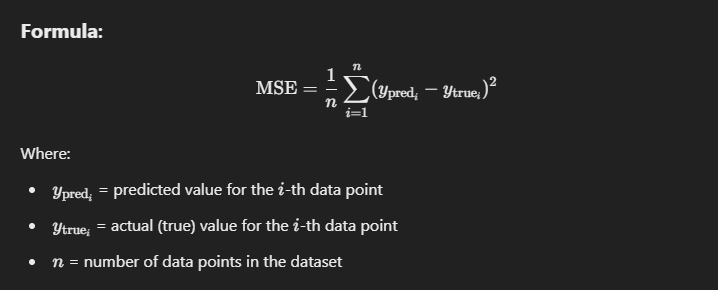


**Observation**:
- **MSE Loss** is suitable when you want the model to learn to make accurate continuous predictions, penalizing large errors heavily.




---

### 2. **Setting up Example Data**

- **Creating Random Tensors**:
  - To simulate a simple regression task, we generate two random tensors: `outputs` (predictions made by the model) and `targets` (true values we want the model to predict).
  - Both tensors need to have the **same shape** because MSE computes the difference element-wise between corresponding elements in the tensors.

- **Data Setup**:
  - Create two tensors with shape `(3, 5)`:
    - **3 rows**: Represents 3 samples in a batch.
    - **5 columns**: Represents 5 different predictions per sample.

**Code**:


In [1]:
import torch

# Random tensor simulating model's predictions (outputs)
outputs = torch.randn(3, 5, requires_grad=True)  # Predictions from the model

# Random tensor simulating true target values (targets)
targets = torch.randn(3, 5)  # Actual target values we want to predict

print("Outputs (predictions):\n", outputs)
print("Targets (true values):\n", targets)


Outputs (predictions):
 tensor([[-1.8455, -1.4479,  0.3278, -1.4879,  0.8969],
        [ 0.5001, -0.8892,  1.2616, -0.2520, -0.1687],
        [ 0.2723, -1.8432,  0.3184, -0.1779,  0.3881]], requires_grad=True)
Targets (true values):
 tensor([[-0.7080, -0.5256, -0.6466, -2.1587,  0.1539],
        [-0.1524, -1.2139,  0.3733,  0.2411,  2.2925],
        [ 0.7605,  0.1976,  0.4231, -0.2288, -0.2484]])



**Explanation**:
- The **outputs** tensor represents the model’s predicted values for 3 samples, each with 5 predictions.
- The **targets** tensor represents the actual values that the model is trying to predict.

**Observation**:
- The shapes of the **outputs** and **targets** must match, as MSE is calculated by taking the element-wise difference between corresponding elements in the tensors.

---

### 3. **Computing MSE Loss**

- **Using `nn.MSELoss()`**:
  - PyTorch provides the `nn.MSELoss()` function, which automatically computes the mean squared error between the predicted values (`outputs`) and the true values (`targets`).

**Code**:


In [2]:
import torch.nn as nn

# Define MSE Loss function
mse_loss = nn.MSELoss()

# Compute the MSE loss between outputs and targets
loss = mse_loss(outputs, targets)
print("MSE Loss:", loss.item())  # Print the loss value


MSE Loss: 1.1025532484054565



**Explanation**:
- The **MSE Loss** function computes the average of the squared differences between the elements of `outputs` and `targets`.
- The result is a single scalar value that represents how well the model’s predictions match the true values (lower is better).

**Observation**:
- The MSE loss tells you how far off your model’s predictions are from the true values. A **lower MSE** indicates that the model is making more accurate predictions.

---

### 4. **Hands-on Example**

- **Modifying the Output and Target Values**:
  - By manually adjusting the values of `outputs` and `targets`, we can observe how changes in predictions affect the MSE loss.
  
**Task**:
- Modify the values in the `outputs` and `targets` tensors and recompute the MSE loss:


In [3]:
# Adjusting output and target values to observe how MSE changes
outputs = torch.tensor([[1.0, 2.0, 3.0, 4.0, 5.0],
                        [1.0, 2.0, 3.0, 4.0, 5.0],
                        [1.0, 2.0, 3.0, 4.0, 5.0]], requires_grad=True)

targets = torch.tensor([[1.5, 2.5, 3.5, 4.5, 5.5],
                        [0.5, 1.5, 2.5, 3.5, 4.5],
                        [2.0, 3.0, 4.0, 5.0, 6.0]])

# Recompute MSE loss
loss = mse_loss(outputs, targets)
print("MSE Loss after modifying values:", loss.item())


MSE Loss after modifying values: 0.5



**Observation**:
- As the difference between `outputs` and `targets` increases, the MSE loss will increase, indicating that the model’s predictions are further from the true values.

- **Introducing a Shape Mismatch**:
  - MSE Loss requires the `outputs` and `targets` to have the **same shape**. Introducing a shape mismatch will result in an error.

**Task**:
- Change the shape of one of the tensors and observe the error:


In [4]:
# Changing the shape of outputs to introduce a mismatch
outputs = torch.randn(3, 4)  # Mismatch with targets (3, 5)

try:
    loss = mse_loss(outputs, targets)
except Exception as e:
    print("Error due to shape mismatch:", e)


Error due to shape mismatch: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([3, 5])) that is different to the input size (torch.Size([3, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



**Observation**:
- PyTorch will raise an error when there is a shape mismatch, as the MSE computation is element-wise and requires both tensors to have the same number of elements.

---

### 5. **Exercise**

- **Creating Your Own Example**:
  - Create new tensors with different shapes and values, then compute the MSE loss.
  - Experiment with different numbers and observe how the loss changes when the difference between predictions and targets increases or decreases.

**Task**:
- Create your own tensors and compute MSE loss:


In [5]:
# Your own example
outputs = torch.tensor([[2.0, 2.5], [3.0, 3.5]], requires_grad=True)
targets = torch.tensor([[2.1, 2.6], [3.1, 3.6]])

loss = mse_loss(outputs, targets)
print("MSE Loss for custom example:", loss.item())


MSE Loss for custom example: 0.00999998115003109



- **Comparing MSE Loss with L1 Loss**:
  - **L1 Loss** (also called **Mean Absolute Error**) computes the absolute difference between predictions and true values. It does not square the differences, meaning it is less sensitive to outliers.
  
**Task**:
- Compare MSE and L1 losses for the same data:


In [6]:
# Define L1 Loss function
l1_loss = nn.L1Loss()

# Compute L1 Loss
l1_loss_value = l1_loss(outputs, targets)
print("L1 Loss:", l1_loss_value.item())

# Compare with MSE Loss
mse_loss_value = mse_loss(outputs, targets)
print("MSE Loss:", mse_loss_value.item())


L1 Loss: 0.09999990463256836
MSE Loss: 0.00999998115003109



**Observation**:
- **MSE Loss** penalizes larger errors more due to the squaring of differences, while **L1 Loss** is more forgiving of outliers because it only considers the absolute difference.

---

### 6. **Conclusion**

- **Recap of MSE Loss**:
  - **MSE Loss** is widely used in regression tasks to measure the average squared difference between predicted values and true values.
  - It penalizes large errors more heavily, making it sensitive to outliers in the data.
  
- **Difference Between MSE and L1 Loss**:
  - **MSE Loss** is more sensitive to large errors, while **L1 Loss** (Mean Absolute Error) gives equal weight to all errors.
  - MSE is typically used in scenarios where larger errors are more critical, while L1 can be used when outliers should not dominate the error calculation.

**Quiz**:
- Why is it important for `outputs` and `targets` to have the same shape when calculating MSE loss?
- What is the main difference between MSE Loss and L1 Loss?

**Takeaway**:
- **MSE Loss** is crucial for regression tasks, where minimizing the squared difference between predictions and true values helps the model learn more accurate predictions.

---